In [110]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [146]:
def convert_pvalue_to_asterisks(pvalue):
    if pvalue <= 0.0001:
        return "****"
    elif pvalue <= 0.001:
        return "***"
    elif pvalue <= 0.01:
        return "**"
    elif pvalue <= 0.05:
        return "*"
    return "ns"

In [147]:
dat_df_eo = pd.read_csv("dat_df_eo.csv", sep=',')
dat_df_eh = pd.read_csv("dat_df_eh.csv", sep=',')

In [148]:
dat_df_eo['soa'] = dat_df_eo['soa']*1000
dat_df_eh['soa'] = dat_df_eh['soa']*1000

In [149]:
dat_df_eo['soa'] = dat_df_eo['soa'].astype(int)
dat_df_eh['soa'] = dat_df_eh['soa'].astype(int)

In [150]:
## Don't consider high cue amplitude

dat_df_eo = dat_df_eo[(dat_df_eo['saccade_time_to_lum'] > 70) & (dat_df_eo['cue_amplitude'] == 'normal')]

### Fix SOA

In [151]:
dat_df_eo['soa'].unique()

array([100,  20,  50, 200, 300])

In [152]:
main_soas = [20, 50, 100, 200, 300]

dat_df_eh = dat_df_eh[dat_df_eh['soa'].isin(main_soas)]

In [153]:
dat_df_eh['soa'].unique()

array([100,  50, 200,  20, 300])

## Eye only grouped_by_soa_congr_df

In [154]:
session_values = np.unique(dat_df_eo['filename'])
soa_values = np.unique(dat_df_eo['soa'])
final_df = pd.DataFrame({'soa': [], 'perf_congr': [], 'perf_incongr': [], 'RT_congr': [], 'RT_incongr':[], 'n_congr': [], 'n_incongr':[]})

for day in session_values:
    session = dat_df_eo[dat_df_eo['filename']==day]
    
    #filename_lst = []
    #soas_lst = []
    #congr_perf_lst = []
    #incongr_perf_lst = []
    #congr_n = []
    #incongr_n = []
    #congr_RT_lst = []
    #incongr_RT_lst = []
    for i in soa_values:

        filename_lst = []
        soas_lst = []
        congr_perf_lst = []
        incongr_perf_lst = []
        congr_n = []
        incongr_n = []
        congr_RT_lst = []
        incongr_RT_lst = []

        subset = session[session['soa'] == i]

        ## CONGRUENT
        corr_congr = subset[(subset['hit_from_eye'] == True) & (subset['cue_lum_congruency'] == "congruent")]
        incorr_congr = subset[(subset['hit_from_eye'] == False) & (subset['cue_lum_congruency'] == "congruent")]
        congr_n_trials = len(corr_congr) + len(incorr_congr)

        ## INCONGRUENT
        corr_incongr = subset[(subset['hit_from_eye'] == True) & (subset['cue_lum_congruency'] == "incongruent")]
        incorr_incongr = subset[(subset['hit_from_eye'] == False) & (subset['cue_lum_congruency'] == "incongruent")]
        incongr_n_trials = len(corr_incongr) + len(incorr_incongr)

        if congr_n_trials >= 1 and incongr_n_trials >= 1:
            soas_lst.append(i)
            congr_perf = len(corr_congr) / congr_n_trials
            #print(congr_n_trials)
            congr_n.append(congr_n_trials)
            congr_perf_lst.append(congr_perf)
            #print('Performance in congruent:', congr_perf, 'soa', i)
            congr_RT =  np.mean(corr_congr['saccade_time_to_lum'])
            congr_RT_lst.append(congr_RT)
            incongr_perf = len(corr_incongr) / incongr_n_trials
            incongr_n.append(incongr_n_trials)
            incongr_perf_lst.append(incongr_perf)
            #print('Performance in incongruent:', incongr_perf, 'soa', i)
            incongr_RT = np.mean(corr_incongr['saccade_time_to_lum'])
            incongr_RT_lst.append(incongr_RT)
            
        temp_df = pd.DataFrame({'soa': soas_lst, 'perf_congr': congr_perf_lst, 'perf_incongr': incongr_perf_lst, 
                'RT_congr': congr_RT_lst, 'RT_incongr': incongr_RT_lst, 'n_congr': congr_n, 'n_incongr':incongr_n})
        final_df = pd.concat([final_df,temp_df])

In [155]:
final_df

,soa,perf_congr,perf_incongr,RT_congr,RT_incongr,n_congr,n_incongr
0,20.0,0.875000,0.769231,435.547619,504.000000,24.0,13.0
0,50.0,0.842105,0.739130,466.437500,457.352941,19.0,23.0
0,100.0,0.809524,0.892857,372.852941,409.780000,21.0,28.0
0,20.0,0.909091,0.842105,528.650000,482.937500,11.0,19.0
0,50.0,0.928571,0.857143,439.192308,390.791667,14.0,14.0
...,...,...,...,...,...,...,...
0,300.0,0.764706,0.756757,459.038462,409.053571,34.0,37.0
0,300.0,0.763889,0.822581,423.890909,393.166667,72.0,62.0
0,300.0,0.678571,0.740741,446.736842,447.900000,28.0,27.0
0,300.0,0.616667,0.771429,416.081081,446.833333,60.0,70.0


In [156]:
from scipy.stats import mannwhitneyu

pvalues = []
x_values = np.unique(final_df['soa'])
for x in x_values:
    stat, pvalue = mannwhitneyu(final_df[final_df['soa'] == x]['RT_congr'], final_df[final_df['soa'] == x]['RT_incongr'], alternative='greater')
    print(pvalue)
    pvalues.append(convert_pvalue_to_asterisks(pvalue))

0.9086227332582053
0.3093347785411311
0.7979718739173969
nan
0.4212730301475788


In [157]:
pvalues

['ns', 'ns', 'ns', 'ns', 'ns']

In [158]:
final_df = final_df.reset_index(drop=True)

In [159]:
final_df['soa'] = final_df['soa'].astype(int)

In [160]:
soa = []
RTs = []
cat = []

for i in range(len(final_df)):
    soa.append(final_df['soa'][i])
    RTs.append(final_df['RT_congr'][i])
    cat.append('congruent')
    soa.append(final_df['soa'][i])
    RTs.append(final_df['RT_incongr'][i])
    cat.append('incongruent')

In [161]:
for_violin_perf = pd.DataFrame({'Stimulus Onset Asynchrony (ms)': soa, 'Reaction Time (ms)': RTs, 'Condition':cat})

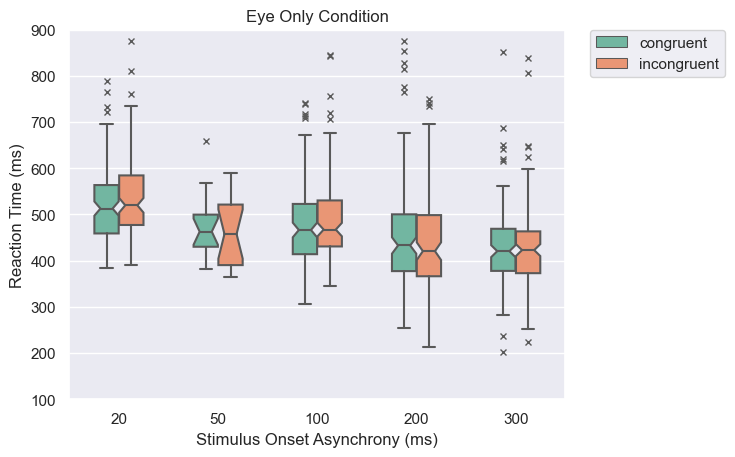

In [166]:
sns.set_theme(style='darkgrid')
sns.boxplot(data=for_violin_perf, x="Stimulus Onset Asynchrony (ms)", y="Reaction Time (ms)", notch=True, flierprops={"marker": "x"}, hue="Condition", palette='Set2', width=0.5).set(title='Eye Only Condition')
plt.ylim(100, 900)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

### Eye&Head

In [167]:
session_values = np.unique(dat_df_eh['filename'])
soa_values = np.unique(dat_df_eh['soa'])
final_df = pd.DataFrame({'soa': [], 'perf_congr': [], 'perf_incongr': [], 'RT_congr': [], 'RT_incongr':[], 'n_congr': [], 'n_incongr':[]})

for day in session_values:
    session = dat_df_eh[dat_df_eh['filename']==day]
    
    #filename_lst = []
    #soas_lst = []
    #congr_perf_lst = []
    #incongr_perf_lst = []
    #congr_n = []
    #incongr_n = []
    #congr_RT_lst = []
    #incongr_RT_lst = []
    for i in soa_values:

        filename_lst = []
        soas_lst = []
        congr_perf_lst = []
        incongr_perf_lst = []
        congr_n = []
        incongr_n = []
        congr_RT_lst = []
        incongr_RT_lst = []

        subset = session[session['soa'] == i]

        ## CONGRUENT
        corr_congr = subset[(subset['hit_from_eye'] == True) & (subset['cue_lum_congruency'] == "congruent")]
        incorr_congr = subset[(subset['hit_from_eye'] == False) & (subset['cue_lum_congruency'] == "congruent")]
        congr_n_trials = len(corr_congr) + len(incorr_congr)

        ## INCONGRUENT
        corr_incongr = subset[(subset['hit_from_eye'] == True) & (subset['cue_lum_congruency'] == "incongruent")]
        incorr_incongr = subset[(subset['hit_from_eye'] == False) & (subset['cue_lum_congruency'] == "incongruent")]
        incongr_n_trials = len(corr_incongr) + len(incorr_incongr)

        if congr_n_trials >= 1 and incongr_n_trials >= 1:
            soas_lst.append(i)
            congr_perf = len(corr_congr) / congr_n_trials
            #print(congr_n_trials)
            congr_n.append(congr_n_trials)
            congr_perf_lst.append(congr_perf)
            #print('Performance in congruent:', congr_perf, 'soa', i)
            congr_RT =  np.mean(corr_congr['saccade_time_to_lum'])
            congr_RT_lst.append(congr_RT)
            incongr_perf = len(corr_incongr) / incongr_n_trials
            incongr_n.append(incongr_n_trials)
            incongr_perf_lst.append(incongr_perf)
            #print('Performance in incongruent:', incongr_perf, 'soa', i)
            incongr_RT = np.mean(corr_incongr['saccade_time_to_lum'])
            incongr_RT_lst.append(incongr_RT)
            
        temp_df = pd.DataFrame({'soa': soas_lst, 'perf_congr': congr_perf_lst, 'perf_incongr': incongr_perf_lst, 
                'RT_congr': congr_RT_lst, 'RT_incongr': incongr_RT_lst, 'n_congr': congr_n, 'n_incongr':incongr_n})
        final_df = pd.concat([final_df,temp_df])

In [168]:
final_df

,soa,perf_congr,perf_incongr,RT_congr,RT_incongr,n_congr,n_incongr
0,20.0,1.000000,1.000000,874.500000,1036.500000,1.0,1.0
0,100.0,1.000000,0.666667,1033.000000,867.250000,4.0,3.0
0,200.0,1.000000,0.600000,1107.500000,988.833333,1.0,5.0
0,100.0,0.750000,1.000000,1330.166667,2578.000000,4.0,1.0
0,300.0,1.000000,1.000000,651.000000,1044.500000,2.0,1.0
...,...,...,...,...,...,...,...
0,50.0,0.888889,0.750000,410.979167,389.527778,27.0,24.0
0,100.0,0.903226,0.628571,382.357143,355.045455,31.0,35.0
0,20.0,0.857143,0.767442,485.152778,558.227273,42.0,43.0
0,50.0,0.863636,0.772727,460.013158,504.558824,44.0,44.0


In [169]:
final_df['soa'] = final_df['soa'].astype(int)

In [170]:
stat, pval = wilcoxon(final_df['RT_congr'], final_df['RT_congr'], alternative='less', method='approx')
pval

nan

In [171]:
from scipy.stats import mannwhitneyu

pvalues = []
x_values = np.unique(final_df['soa'])
for x in x_values:
    stat, pvalue = mannwhitneyu(final_df[final_df['soa'] == x]['RT_congr'], final_df[final_df['soa'] == x]['RT_incongr'], alternative='greater')
    print(pvalue)
    pvalues.append(convert_pvalue_to_asterisks(pvalue))

0.7671572193289209
nan
0.8525559082434395
0.6007770007770006
0.07443047415016377


In [172]:
pvalues

['ns', 'ns', 'ns', 'ns', 'ns']

In [173]:
final_df = final_df.reset_index(drop=True)

In [174]:
soa = []
RTs = []
cat = []

for i in range(len(final_df)):
    soa.append(final_df['soa'][i])
    RTs.append(final_df['RT_congr'][i])
    cat.append('congruent')
    soa.append(final_df['soa'][i])
    RTs.append(final_df['RT_incongr'][i])
    cat.append('incongruent')

In [175]:
for_violin_perf = pd.DataFrame({'Stimulus Onset Asynchrony (ms)': soa, 'Reaction Time (ms)': RTs, 'Condition':cat})

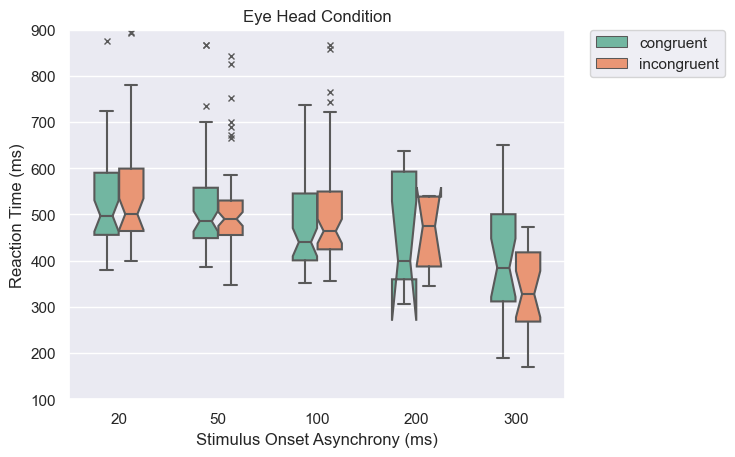

In [176]:
sns.set_theme(style='darkgrid')
sns.boxplot(data=for_violin_perf, x="Stimulus Onset Asynchrony (ms)", y="Reaction Time (ms)", notch=True, flierprops={"marker": "x"}, hue="Condition", palette='Set2', width=0.5).set(title='Eye Head Condition')
plt.ylim(100, 900)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

In [109]:
for_violin_perf

,Stimulus Onset Asynchrony (ms),Reaction Time (ms),Condition
0,20,874.500000,congruent
1,20,1036.500000,incongruent
2,100,1033.000000,congruent
3,100,867.250000,incongruent
4,200,1107.500000,congruent
...,...,...,...
367,20,558.227273,incongruent
368,50,460.013158,congruent
369,50,504.558824,incongruent
370,100,378.277778,congruent
